In [1]:
!pip install datasets

In [2]:
import datasets

In [3]:
dataset = datasets.load_dataset('tweets_hate_speech_detection')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'tweet'],
        num_rows: 31962
    })
    test: Dataset({
        features: ['label', 'tweet'],
        num_rows: 17197
    })
})

In [5]:
dataset['train']

Dataset({
    features: ['label', 'tweet'],
    num_rows: 31962
})

In [6]:
dataset['train']['tweet'][123]

'happy snappy ð\x9f\x99\x8cð\x9f\x8f¼ waiting for the football   #football #snapchat '

In [7]:
sum(dataset['train']['label'])

2242

In [8]:
import nltk
from nltk.corpus import stopwords

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
stopwords = stopwords.words('english') + ['@user', '&amp', 'amp', '\'']

In [12]:
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer('basic_english')

In [13]:
dataset['train']['tweet'][0]

'@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [14]:
tokenizer(dataset['train']['tweet'][0])

['@user',
 'when',
 'a',
 'father',
 'is',
 'dysfunctional',
 'and',
 'is',
 'so',
 'selfish',
 'he',
 'drags',
 'his',
 'kids',
 'into',
 'his',
 'dysfunction',
 '.',
 '#run']

In [15]:
def split_tokens(row):
  tokens = tokenizer(row['tweet'])
  tokens = [t for t in tokens if t not in stopwords]
  row['tokens'] = tokens

  return row

In [16]:
dataset = dataset.map(split_tokens)

In [17]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'tweet', 'tokens'],
        num_rows: 31962
    })
    test: Dataset({
        features: ['label', 'tweet', 'tokens'],
        num_rows: 17197
    })
})

In [18]:
dataset['train']['tweet'][0]

'@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [19]:
dataset['train']['tokens'][0]

['father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 '.',
 '#run']

In [20]:
from collections import Counter

In [21]:
all_tokens = []
for tokens in dataset['train']['tokens']:
  all_tokens.extend(tokens)

In [22]:
len(all_tokens)

312849

In [23]:
counts = Counter(all_tokens)

In [24]:
counts.most_common(20)

[('.', 24754),
 ('!', 14650),
 (',', 6349),
 ('?', 2600),
 ('day', 2010),
 ('happy', 1541),
 ('#love', 1468),
 ('-', 1334),
 ('love', 1201),
 ('u', 1164),
 ('time', 1087),
 ('â\x80¦', 1056),
 (')', 1047),
 ('today', 1001),
 ('like', 974),
 ('get', 917),
 ('new', 915),
 ('#positive', 871),
 ('people', 809),
 ('(', 789)]

In [25]:
counts.items()

dict_items([('father', 498), ('dysfunctional', 1), ('selfish', 10), ('drags', 4), ('kids', 144), ('dysfunction', 2), ('.', 24754), ('#run', 33), ('thanks', 271), ('#lyft', 2), ('credit', 13), ('use', 114), ('cause', 72), ('offer', 26), ('wheelchair', 2), ('vans', 1), ('pdx', 1), ('#disapointed', 1), ('#getthanked', 2), ('bihday', 555), ('majesty', 7), ('#model', 361), ('love', 1201), ('u', 1164), ('take', 616), ('time', 1087), ('urð\x9f\x93±', 325), ('!', 14650), ('ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 325), ('ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦', 326), ('factsguide', 12), ('society', 22), ('#motivation', 165), ('[2/2]', 1), ('huge', 42), ('fan', 61), ('fare', 4), ('big', 180), ('talking', 64), ('leave', 134), ('chaos', 5), ('pay', 182), ('disputes', 1), ('get', 917), ('#allshowandnogo', 1), ('camping', 12), ('tomorrow', 428), ('dannyâ\x80¦', 1), ('next', 326), ('school', 170), ('year', 312), ('exams', 13), ('ð\x9f\x98¯', 3), ('think', 400), ('ð\x9f\x98\xad', 46), ('#school', 2

In [26]:
vocab = [t for t, c in counts.items() if c >= 10]  # list comprehension

In [27]:
len(vocab)

3674

In [28]:
list(enumerate(vocab))

[(0, 'father'),
 (1, 'selfish'),
 (2, 'kids'),
 (3, '.'),
 (4, '#run'),
 (5, 'thanks'),
 (6, 'credit'),
 (7, 'use'),
 (8, 'cause'),
 (9, 'offer'),
 (10, 'bihday'),
 (11, '#model'),
 (12, 'love'),
 (13, 'u'),
 (14, 'take'),
 (15, 'time'),
 (16, 'urð\x9f\x93±'),
 (17, '!'),
 (18, 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91'),
 (19, 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'),
 (20, 'factsguide'),
 (21, 'society'),
 (22, '#motivation'),
 (23, 'huge'),
 (24, 'fan'),
 (25, 'big'),
 (26, 'talking'),
 (27, 'leave'),
 (28, 'pay'),
 (29, 'get'),
 (30, 'camping'),
 (31, 'tomorrow'),
 (32, 'next'),
 (33, 'school'),
 (34, 'year'),
 (35, 'exams'),
 (36, 'think'),
 (37, 'ð\x9f\x98\xad'),
 (38, '#school'),
 (39, '#hate'),
 (40, '#girl'),
 (41, 'land'),
 (42, '#cavs'),
 (43, '#cleveland'),
 (44, 'â\x80¦'),
 (45, 'welcome'),
 (46, 'â\x86\x9d'),
 (47, '#ireland'),
 (48, 'consumer'),
 (49, 'price'),
 (50, 'index'),
 (51, '('),
 (52, 'mom'),
 (53, ')'),
 (54, 'previous'),
 (55, '0'),
 (56, '2%'),
 (57, '5%'),

In [29]:
x = ['a', 'b', 'c']

In [30]:
list(enumerate(x))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [31]:
id2token = dict(enumerate(vocab))

In [32]:
id2token[100]

'made'

In [33]:
token2id = {t:i for i, t in id2token.items()}

In [34]:
token2id['made']

100

In [35]:
len(vocab)

3674

In [36]:
dataset['train']['tokens'][0]

['father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 '.',
 '#run']

In [37]:
def remove_rare_tokens(row):
  row['filtered_tokens'] = [t for t in row['tokens'] if t in vocab]
  return row

In [38]:
dataset = dataset.map(remove_rare_tokens)

In [39]:
dataset['train']

Dataset({
    features: ['label', 'tweet', 'tokens', 'filtered_tokens'],
    num_rows: 31962
})

In [40]:
dataset['train']['tokens'][0]

['father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 '.',
 '#run']

In [41]:
dataset['train']['filtered_tokens'][0]

['father', 'selfish', 'kids', '.', '#run']

In [42]:
def windowizer(row):
  window_size = 2

  doc = row['filtered_tokens']
  out = []

  for i, token in enumerate(doc):
    target = token2id[token]

    window = []

    for j in range(-window_size, window_size+1):  # range(-2, 3) -> [-2, -1, 0, 1, 2]
      index = i+j

      if index < 0 or index >= len(doc) or j == 0:
        continue

      window.append(index)

    aux = []
    for wi in window:
      aux.append((target, token2id[doc[wi]]))
    out.extend(aux)

  row['moving_window'] = out
  return row

In [43]:
dataset = dataset.map(windowizer)

In [44]:
dataset['train']

Dataset({
    features: ['label', 'tweet', 'tokens', 'filtered_tokens', 'moving_window'],
    num_rows: 31962
})

In [45]:
dataset['train']['moving_window'][0]

[[0, 1],
 [0, 2],
 [1, 0],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 3],
 [2, 4],
 [3, 1],
 [3, 2],
 [3, 4],
 [4, 2],
 [4, 3]]

In [46]:
from torch.utils.data import Dataset

In [47]:
class Word2VecDataset(Dataset):
  def __init__(self, dataset):
    self.dataset = dataset
    self.data = []

    for example in self.dataset['moving_window']:
      self.data.extend(example)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    return self.data[index]


In [48]:
my_dataset = Word2VecDataset(dataset['train'])

In [49]:
len(my_dataset)

726180

In [50]:
my_dataset[100]

[3, 29]

In [51]:
from torch.utils.data import DataLoader

dataloader = DataLoader(my_dataset, batch_size=512, shuffle=True)

In [52]:
import torch
from torch import nn

In [53]:
class Word2Vec(nn.Module):
  def __init__(self, vocab_size, embedding_size):
    super().__init__()
    self.embed = nn.Embedding(vocab_size, embedding_size)
    self.expand = nn.Linear(embedding_size, vocab_size)

  def forward(self, x):
    hidden = self.embed(x)
    return self.expand(hidden)

In [54]:
test = nn.Embedding(3674, 50)

In [55]:
test(torch.tensor(3))

tensor([ 1.2135,  0.9165,  1.3715, -0.2678, -2.0583,  0.1023, -0.1825,  0.2046,
         1.3571, -1.2798, -0.9652, -0.4976, -0.0948, -1.1950,  0.4114, -0.4513,
         1.4302, -0.3033,  0.2292, -0.2776,  0.6793,  0.0111, -0.3580, -0.2442,
        -0.0942,  1.7787, -0.8215, -0.1421,  1.5812, -1.1830, -1.5062, -1.4220,
         0.4327, -0.1409,  0.1247, -0.2301, -1.2021, -0.6663, -0.3858,  0.0453,
         0.3272, -1.1902, -0.5476,  1.9250, -1.7536,  0.4223, -0.1275, -0.7906,
        -0.2031, -0.5398], grad_fn=<EmbeddingBackward0>)

In [56]:
test(torch.tensor(3)).shape

torch.Size([50])

In [57]:
len(vocab)

3674

In [58]:
EMBED_SIZE = 100
model = Word2Vec(len(vocab), EMBED_SIZE)

In [59]:
model(torch.tensor(0))

tensor([-0.9810,  0.5157, -0.7931,  ...,  0.7198, -0.0338,  0.4996],
       grad_fn=<ViewBackward0>)

In [60]:
LR = 0.003
EPOCHS = 50

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

device = torch.device('cuda')
model.to(device)

Word2Vec(
  (embed): Embedding(3674, 100)
  (expand): Linear(in_features=100, out_features=3674, bias=True)
)

In [61]:
from tqdm import tqdm

all_losses = []
progress_bar = tqdm(range(len(dataloader)*EPOCHS))

for epoch in range(EPOCHS):
  epoch_loss = 0

  for input, context in dataloader:
    input = input.to(device)
    # print('input', input)
    # print('input shape', input.shape)

    context = context.to(device)
    # print('context', context)
    # print('context shape', context.shape)

    optimizer.zero_grad()

    output = model(input)
    # print('output', output)
    # print('output shape', output.shape)

    loss = loss_fn(output, context)
    # print('loss', loss)
    # print('loss shape', loss.shape)

    epoch_loss += loss.item()

    loss.backward()
    optimizer.step()
    progress_bar.update(1)

  all_losses.append(epoch_loss/len(dataloader))

100%|█████████▉| 70916/70950 [02:43<00:00, 442.53it/s]

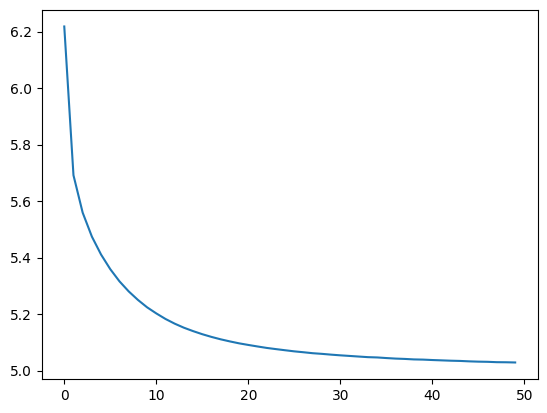

In [62]:
import matplotlib.pyplot as plt
plt.plot(all_losses)

In [63]:
word2vecs = model.expand.weight.cpu().detach().numpy()

In [67]:
word2vecs.shape

(3674, 100)

In [69]:
id2token[35]

'exams'

In [70]:
word2vecs[35]

array([-0.9707179 , -1.1723222 , -0.9856007 , -0.2780179 ,  0.08265851,
       -0.06646251, -0.39566487, -0.46885285,  0.39068416,  0.04753142,
        0.59946597,  0.9075947 , -0.37612244, -0.41018322, -0.64794946,
       -0.08145267,  0.25714728,  0.7919779 ,  0.31090358,  0.01765592,
        0.09360841, -0.51200783, -0.28918284,  0.3797167 ,  0.3880587 ,
        0.01344721,  0.14396633,  0.393217  ,  0.80738926,  0.4730755 ,
        0.93178415, -0.5851751 ,  0.6611748 ,  0.00212106,  0.50714236,
        0.24695203,  0.4010111 ,  0.5388398 ,  0.02943123,  0.20433886,
       -0.46577147,  0.43136126,  0.8112996 ,  0.33452186,  0.6614189 ,
        0.6654844 , -0.27587202, -0.11138329,  0.6506985 ,  0.09761846,
        0.23088734,  0.18181336,  0.43576983, -0.12455241, -1.0839896 ,
       -0.09459068,  0.2512357 ,  0.11027313,  1.5471315 ,  0.21449353,
        0.5935967 ,  0.26409474, -0.4362456 , -0.00926085,  0.6247792 ,
        0.13149533, -0.08436314,  0.6469929 , -0.65382904,  0.01

In [71]:
from scipy.spatial import distance

In [75]:
distance.pdist([word2vecs[0], word2vecs[1]])

array([6.28014156])

In [76]:
token2id['coffee']

2599

In [77]:
token2id['tea']

2070

In [82]:
distance.pdist([word2vecs[2599], word2vecs[2070]], 'cosine')

array([0.86765232])

In [79]:
token2id['dog']

1863

In [83]:
distance.pdist([word2vecs[2070], word2vecs[1863]], 'cosine')

array([0.96677747])

In [84]:
distances = distance.squareform(distance.pdist(word2vecs, 'cosine'))

In [86]:
distances.shape

(3674, 3674)

In [87]:
distances[1863]

array([1.11828985, 0.89862374, 0.96163696, ..., 0.77165457, 0.80042695,
       0.99405064])

In [90]:
import numpy as np

def most_similar(word, n=10):
  index = token2id[word]
  dist_word = distances[index]
  index_sort = np.argsort(dist_word)
  similar_indexes = index_sort[1:1+n]
  return [id2token[i] for i in similar_indexes]

In [91]:
most_similar('father')

['fathers',
 '#fathersday',
 'day',
 '#father',
 'dads',
 'daddy',
 'b',
 'god',
 'bihday',
 '#dad']

In [92]:
most_similar('dog')

['cats',
 '#pissed',
 'food',
 'fight',
 'cat',
 '#walk',
 'cleveland',
 'soft',
 'makeup',
 'dies']

In [95]:
most_similar('tea')

['salad',
 'putting',
 'bihdays',
 'livelypics',
 'laptop',
 'visiting',
 'perhaps',
 'ð\x9f\x91\x8c',
 'herbal',
 'matt']

In [113]:
most_similar('depression')

['oitnb',
 'menu',
 'snap',
 'winning',
 'lessons',
 'inc',
 'heabroken',
 '40404',
 'created',
 'slowly']